In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [7]:
df['Genre'].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [8]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [12]:

##We have a DataFrame consisting of 9,827 rows and 9 columns.

##Our dataset looks tidy, with no NaNs or duplicated values.

##The Release_Date column needs to be cast into datetime format, and we’ll extract only the year value.

##Overview, Original_Language, and Poster_Url won't be useful during analysis, so we’ll drop them.

##There are noticeable outliers in the Popularity column.

##Vote_Average should be categorized for proper analysis.

##The Genre column contains comma-separated values and extra white spaces that need to be handled and cast into a categorical type.



In [21]:
df['Release_Date'].dtypes

dtype('int32')

In [23]:
# Convert 'Release_Date' to datetime objects
df['Release_Date']=pd.to_datetime(df['Release_Date'])

# Now extract the year
df['Release_Date']=df['Release_Date'].dt.year

In [25]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,1970,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,1970,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,1970,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,1970,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,1970,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [26]:
##Dropping the coloumns

In [27]:
cols=['Overview','Original_Language','Poster_Url']

In [28]:
df.drop(cols,axis=1,inplace=True)

In [29]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,6.3,Thriller
3,1970,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


##Categorizing Vote_Average column
## We would cut the Vote_Average values and make 4 categories;popular,average,below_avg,not_popular to describe it more using catigorize_col() function provided below

In [33]:
def categorize_col(df,col,labels):

  edges=[df[col].describe()['min'],
         df[col].describe()['25%'],
         df[col].describe()['50%'],
         df[col].describe()['75%'],
         df[col].describe()['max']]
  df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
  return df

In [34]:
labels=['not_popular','below_avg','average','popular']
categorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [35]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,below_avg,Thriller
3,1970,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [36]:
df['Vote_Average'].value_counts()

,count
Vote_Average,
not_popular,2467
popular,2450
average,2412
below_avg,2398


In [37]:
df.dropna(inplace=True)

In [38]:
df.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [39]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,1970,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,1970,No Exit,2618.087,122,below_avg,Thriller
3,1970,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,1970,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


**We would split genres into a list then explode our dataframe to have only one genre per row for each movie.**

In [40]:
df['Genre']=df['Genre'].str.split(',')


In [42]:
df=df.explode('Genre').reset_index(drop=True)

In [43]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,1970,The Batman,3827.658,1151,popular,Crime
4,1970,The Batman,3827.658,1151,popular,Mystery


In [45]:
##casting column into category

df['Genre']=df['Genre'].astype('category')

In [46]:
df['Genre'].dtypes


CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 750.3+ KB


In [48]:
df.nunique()

,0
Release_Date,1
Title,9415
Popularity,8088
Vote_Count,3265
Vote_Average,4
Genre,38


In [49]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,1970,The Batman,3827.658,1151,popular,Crime
4,1970,The Batman,3827.658,1151,popular,Mystery


# **Data** **Visualization**

Q.What is the most frequent genre of movies released on Netflix?


In [50]:
sns.set_style('whitegrid')

In [51]:
df['Genre'].describe()

,Genre
count,25552
unique,38
top,Thriller
freq,1960


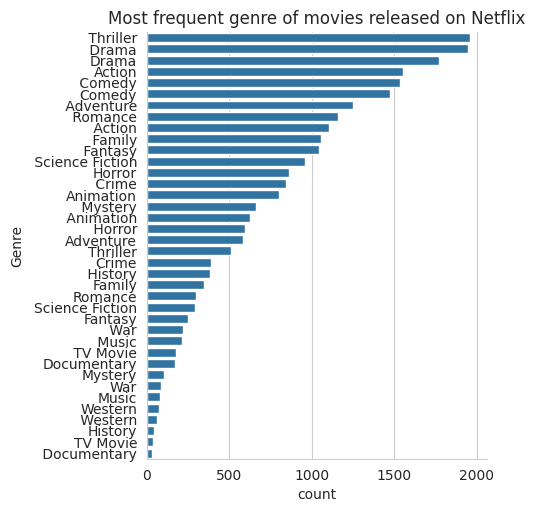

In [52]:
sns.catplot(y='Genre',data=df,kind='count',
            order=df['Genre'].value_counts().index,)
plt.title('Most frequent genre of movies released on Netflix')
plt.show()

Q Which has highest votes in vote avg column ?

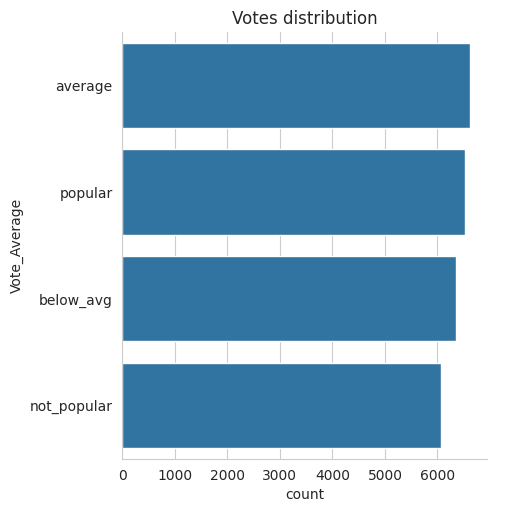

In [54]:
sns.catplot(y='Vote_Average',data=df,kind='count',
            order=df['Vote_Average'].value_counts().index,)
plt.title('Votes distribution')
plt.show()

Q.What movie got highest popularity ?




In [55]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [56]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


**Q.What movie got lowest popularity ?**

In [57]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,1970,The United States vs. Billie Holiday,13.354,152,average,Music
25547,1970,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,1970,The United States vs. Billie Holiday,13.354,152,average,History
25549,1970,Threads,13.354,186,popular,War
25550,1970,Threads,13.354,186,popular,Drama
25551,1970,Threads,13.354,186,popular,Science Fiction


**Q.Which year has the most filmmed movies ?**

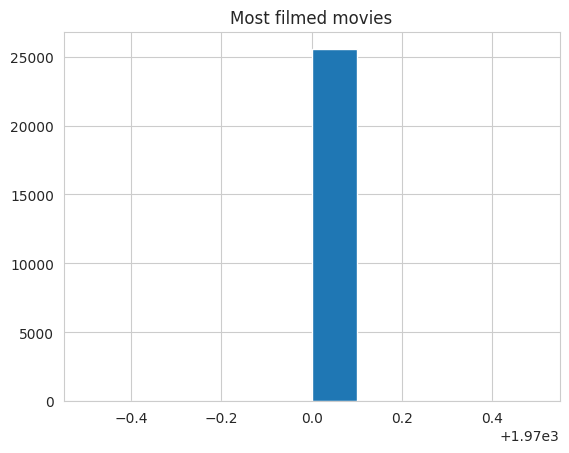

In [60]:
df['Release_Date'].hist()
plt.title('Most filmed movies')
plt.show()